In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import datetime as dt
import matplotlib as mpl
import pandas as pd
plt.style.use('classic')

In [2]:
x = np.random.rand(100)
y1 = np.random.rand(len(x))
y2 = 1.2 + np.exp(x)
sizes = 1000 * np.random.rand(100)

### MATLAB - style interface
--------------------------------

#### Scatter plots customization

Scatter plots provide full control to the individual properties of each plot ( size, face color, edge color, etc.)

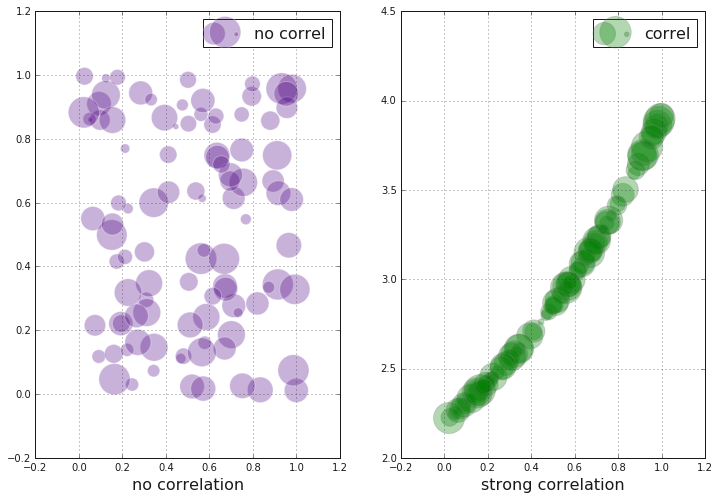

In [3]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(121) # (rows, columns, panel number)
plt.scatter(x,y1, color = 'indigo', alpha = 0.3, edgecolors ='white',
           label ='no correl', s =sizes, cmap ='viridis');
plt.xlabel('no correlation',fontsize =16)
plt.grid(True)
plt.legend(loc = 0, fontsize = 16)

ax2 = fig.add_subplot(122)
plt.scatter(x,y2, color ='green', alpha = 0.3, edgecolors = 'grey',
           label = 'correl', s =sizes, cmap ='viridis');
plt.xlabel('strong correlation',fontsize =16)
plt.grid(True)
plt.legend(loc = 0, fontsize =16)

plt.show();

### Object Oriented interface

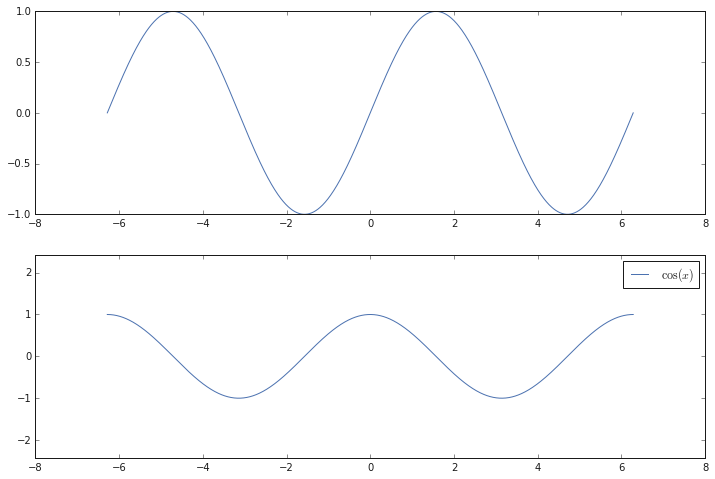

In [4]:
# 1st create a grid of plots
# ax will be an array of two Axes objects
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)

fig, ax = plt.subplots(2, figsize = (12,8))
ax[0].plot(x,np.sin(x),label = '$\sin(x)$')
ax[1].plot(x,np.cos(x),label = '$\cos(x)$')
plt.axis([-8,8,-1.5,1.5])
plt.axis('equal')
plt.legend()
plt.show()

### 3D Shaded labels
---------------------

In [5]:
from matplotlib import patheffects

data = np.random.rand(70)

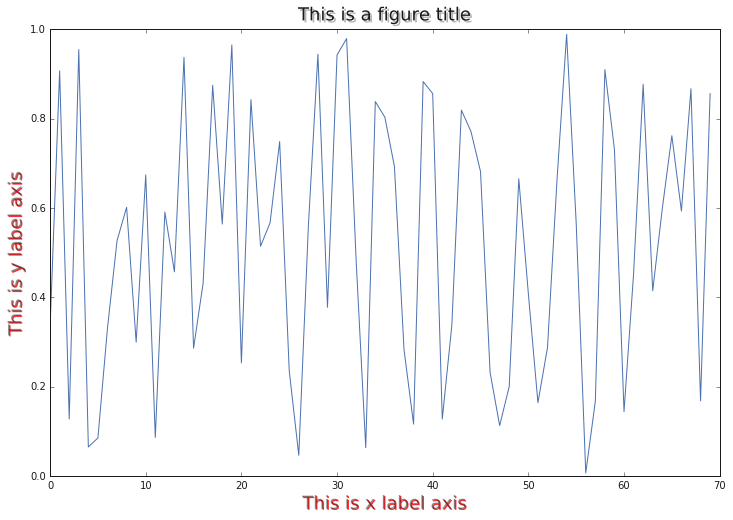

In [6]:
plt.figure(figsize=(12,8))
plt.plot(data)

title_text_obj = plt.title("This is a figure title", fontsize = 18,
                          verticalalignment = 'bottom')
title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])
# offset_xy = set the angle of the shadow
# shadow_rgbFace = set the color of the shadow
# patch_alpha = setup the transparency of the shadow

pe = patheffects.withSimplePatchShadow(offset = (1, -1), shadow_rgbFace = (1,0,0),
                                      alpha = 0.8)
xlabel_obj = plt.xlabel('This is x label axis', fontsize = 18,alpha =0.5)
xlabel_obj.set_path_effects([pe])
ylabel_obj = plt.ylabel('This is y label axis', fontsize = 18,alpha =0.5)
ylabel_obj.set_path_effects([pe])
#plt.style.use('seaborn-whitegrid')

plt.show()

### Customized Legends
------------------

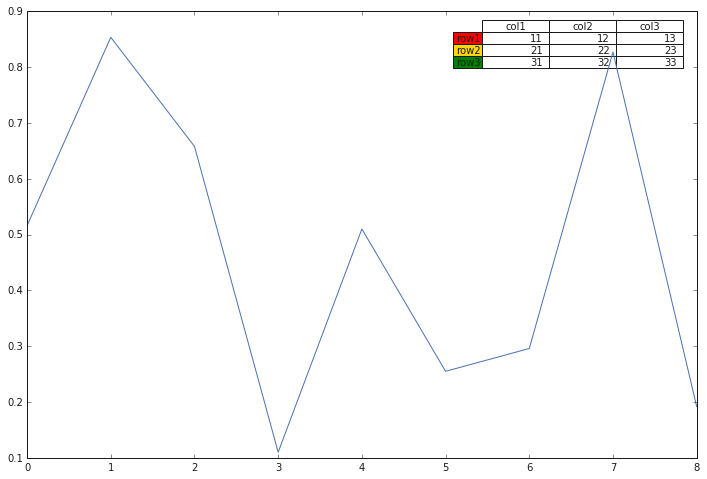

In [7]:
plt.figure(figsize=(12,8))
ax = plt.gca()
y = np.random.rand(9)

col_labels = ['col1','col2','col3']
row_labels = ['row1','row2','row3']
table_vals= [[11,12,13],[21,22,23],[31,32,33]]
row_colors = ['red','gold','green']
my_table = plt.table(cellText = table_vals,colWidths = [.1]* 3,
                    rowLabels = row_labels, colLabels=col_labels,
                    rowColours = row_colors, loc='upper right')
plt.plot(y)
plt.show()

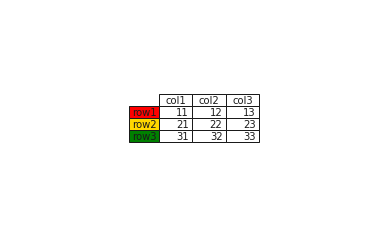

In [8]:
fig, axs =plt.subplots()
axs.axis('tight')
axs.axis('off')
#the_table = axs.table(cellText=clust_data,colLabels=collabel,loc='center')

col_labels = ['col1','col2','col3']
row_labels = ['row1','row2','row3']
table_vals= [[11,12,13],[21,22,23],[31,32,33]]
row_colors = ['red','gold','green']
my_table = axs.table(cellText = table_vals,colWidths = [.1]* 3,
                    rowLabels = row_labels, colLabels=col_labels,
                    rowColours = row_colors, loc='center')


plt.show()

### Grid Set up & Configuration
---------------------------

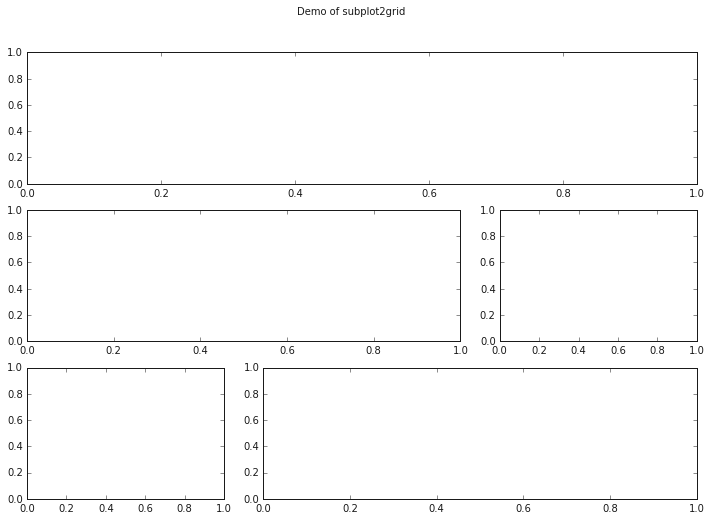

In [9]:
plt.figure(figsize=(12,8))
axes1 = plt.subplot2grid((3,3),(0,0), colspan =3)
axes2 = plt.subplot2grid((3,3),(1,0), colspan =2)
axes3 = plt.subplot2grid((3,3),(1,2))
axes4 = plt.subplot2grid((3,3),(2,0))
axes5 = plt.subplot2grid((3,3),(2,1), colspan =2)

# tidy up tick labels size
all_axes = plt.gcf().axes
for ax in all_axes:
    for ticklabel in ax.get_xticklabels() + ax.get_yticklabels():
        ticklabel.set_fontsize(10)
        
plt.suptitle('Demo of subplot2grid')
plt.show()



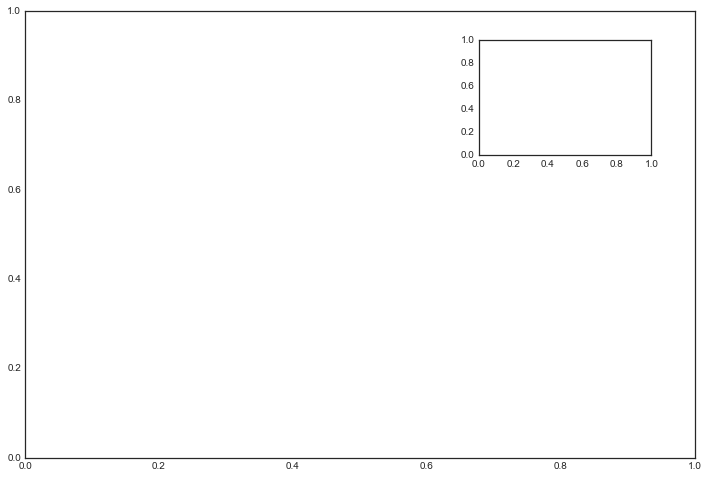

In [10]:
# MATLAB oriented version

fig = plt.figure(figsize=(12,8))
plt.style.use('seaborn-white')
ax1 = plt.axes()
ax2 = plt.axes([.65,.65,.2,.2])

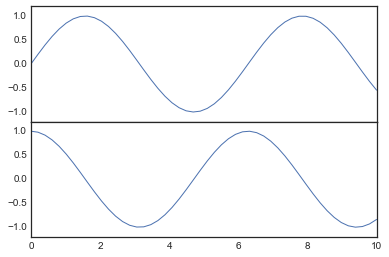

In [11]:
# Object Oriented version

fig = plt.figure()
ax1 = fig.add_axes([.1,.5,.8,.4], xticklabels=[],ylim=(-1.2,1.2))
ax2 = fig.add_axes([.1,.1,.8,.4], ylim=(-1.2,1.2))
x = np.linspace(0,10)
ax1.plot(x, np.sin(x))
ax2.plot(x, np.cos(x));

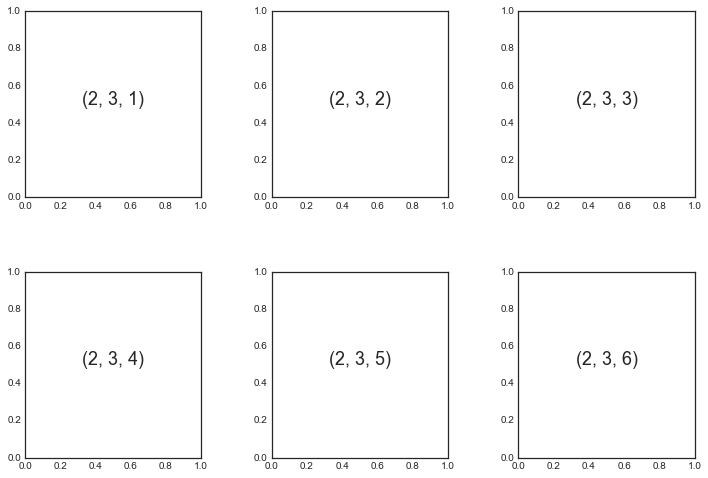

In [12]:
fig = plt.figure(figsize = (12,8))
fig.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.text(.5,.5, str((2,3,i)),fontsize = 18, ha='center')

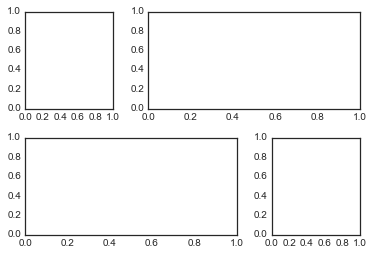

In [13]:
grid = plt.GridSpec(2,3, wspace=0.4,hspace=0.3)
plt.subplot(grid[0,0])
plt.subplot(grid[0,1:])
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2]);


In [14]:
def process_signals(x,y):
    return (1-(x**2 +y**2)) * np.exp(-y**3/3)

x = np.arange(-1.5,1.5,.1)
y = np.arange(-1.5,1.5,.1)
X,Y = np.meshgrid(x,y)
Z = process_signals(X,Y)

N = np.arange(-1.5,1.5,.1)

In [15]:
Z.shape

(30, 30)

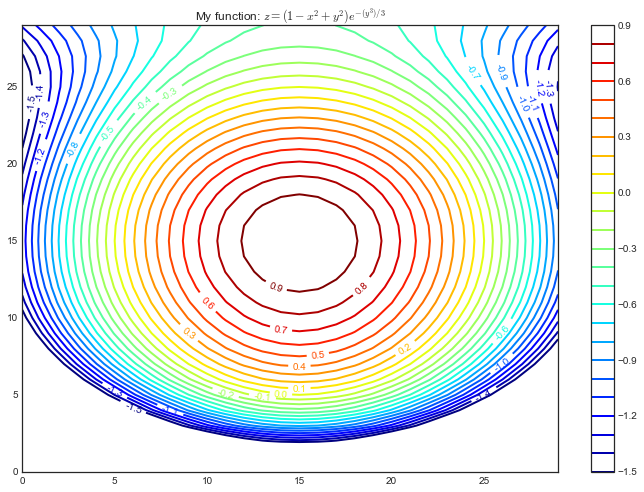

In [16]:
plt.figure(figsize=(12,8))
CS = plt.contour(Z,N, linewidths = 2, cmap=mpl.cm.jet)
plt.clabel(CS,inline= True, fmt='%1.1f', fontsize = 10)
plt.colorbar(CS)
plt.title('My function: $z=(1-x^2+y^2) e^{-(y^3)/3}$')
plt.show()

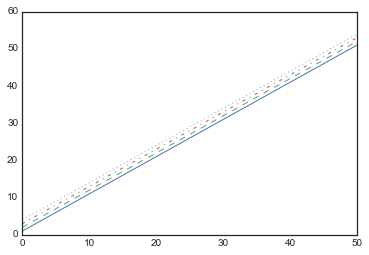

In [17]:
x = np.linspace(0,50,1000)
plt.plot(x, x + 1,linestyle = '-')  # solid
plt.plot(x, x + 2,linestyle = '--') # dashed 
plt.plot(x, x + 3,linestyle = '-.') # dashdot
plt.plot(x, x + 4,linestyle = ':')  # dotted

### Matplotlib Gotchas:
-----------------------

From Object oriented to Matlab interface

<ul>
	<li>plt.xlabel() &rarr; ax.set_xlabel()</li>
	<li>plt.ylabel() &rarr; ax.set_ylabel()</li>
    <li>plt.xlim() &rarr; </li>
    <li>plt.lim() &rarr; ax.set_ylim()</li>
    <li>plt.title() &rarr; ax.set_title()</li>
</ul>

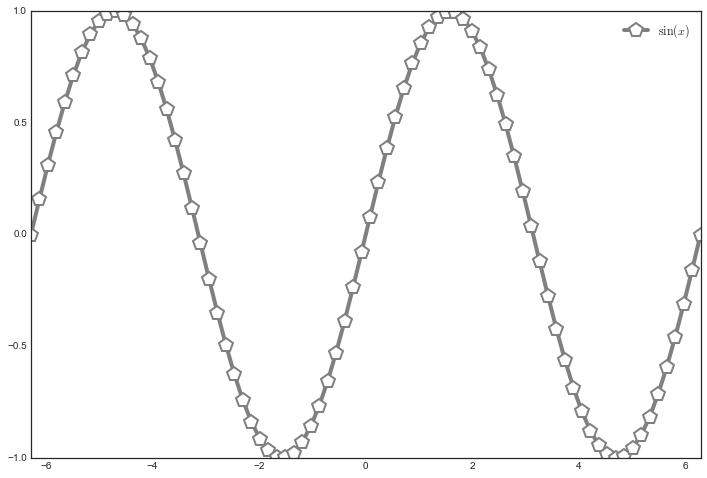

In [18]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 80)

fig, ax = plt.subplots(1, figsize = (12,8))
ax.plot(x,np.sin(x),'-p',label = '$\sin(x)$', color='gray',
       markersize = 15, linewidth =4,
       markerfacecolor ='white', markeredgecolor = 'gray',
       markeredgewidth = 2)
plt.axis([-8,8,-1.5,1.5])
plt.axis('tight')
plt.legend()
plt.show()

### Error bars
--------------

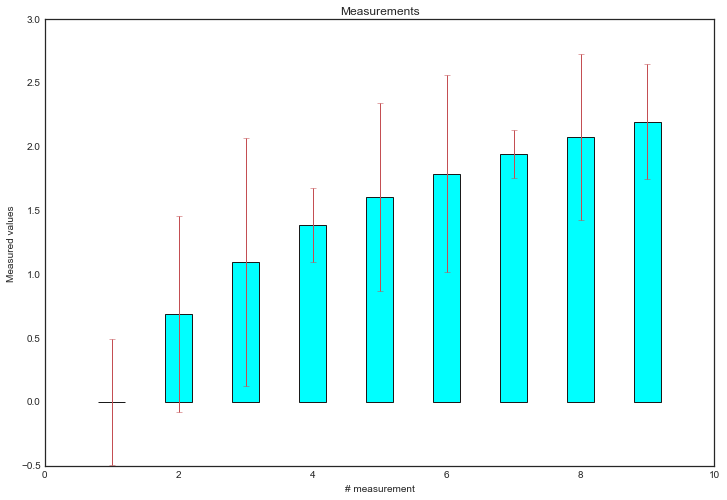

In [19]:
x = np.arange(1,10,1)
y = np.log(x)
xe = 0.1 + np.abs(np.random.rand(len(y)))

plt.figure(figsize=(12,8))
#draw and show error bar
plt.bar(x,y,yerr=xe, width=0.4, align='center',
       ecolor = 'r', color='cyan',label ='experiment #1')

# give some explanations
plt.xlabel('# measurement')
plt.ylabel('Measured values')
plt.title('Measurements');

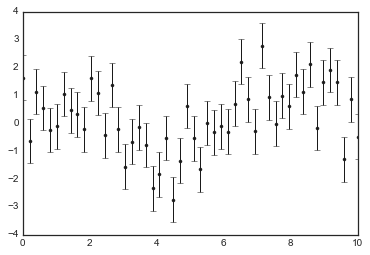

In [20]:
x = np.linspace(0,10,50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x,y,yerr = dy, fmt='.k'); # fmt = black dots

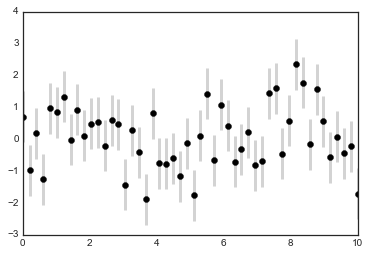

In [21]:
x = np.linspace(0,10,50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x,y,yerr = dy, fmt='o', color = 'black',
            ecolor = 'lightgray', elinewidth = 3, capsize = 0);

### Grid Spec Chart
--------------------------

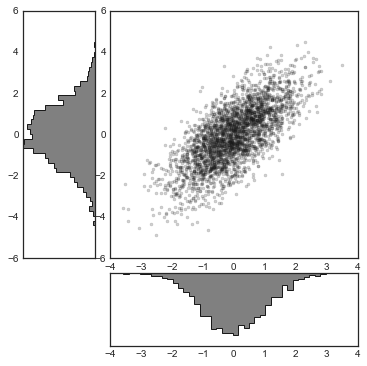

In [22]:
#create normally distributed data
mean = [0,0]
cov  = [[1,1],[1,2]]
x,y = np.random.multivariate_normal(mean,cov,3000).T

# set up axes with gridspec
fig = plt.figure(figsize=(6,6))
grid = plt.GridSpec(4,4,hspace=.2,wspace=.2)
main_ax = fig.add_subplot(grid[:-1,1:])
y_hist = fig.add_subplot(grid[:-1,0], xticklabels=[],sharey=main_ax)
x_hist = fig.add_subplot(grid[-1,1:], yticklabels=[],sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x,y,'ok',markersize=3,alpha=.2)

# histogram on the attached 
x_hist.hist(x, 40, histtype='stepfilled',orientation='vertical',color='gray')
x_hist.invert_yaxis()
y_hist.hist(y,40,histtype='stepfilled',orientation='horizontal',color='gray')
y_hist.invert_xaxis();

### Annotations 
-------------

In [23]:
births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

In [24]:
quartiles = np.percentile(births['births'],[25,50,75])
mu, sig = quartiles[1],0.74*(quartiles[2]-quartiles[0])
births = births.query('(births>@mu - 5 * @sig) & (births <@mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year + 100 * births.month + births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012,month,day) for (month, day) in births_by_date.index]

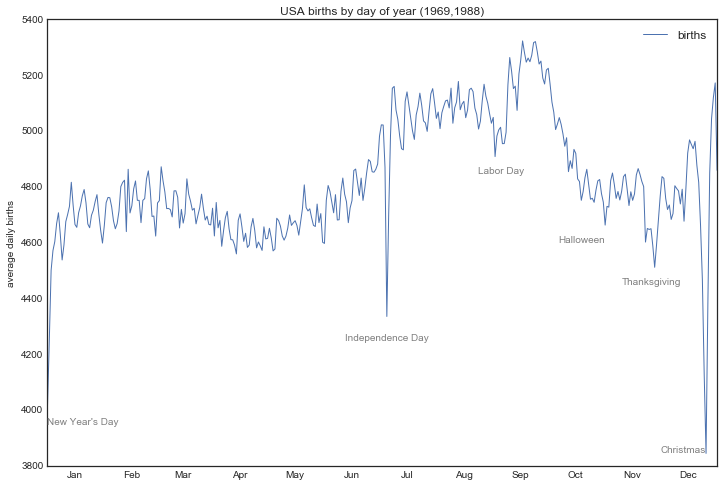

In [25]:
fig , ax = plt.subplots(figsize=(12,8))
births_by_date.plot(ax=ax)

# add labels to the plot
style = dict(size=10,color='gray')

ax.text('2012-1-1',3950 ,"New Year's Day" ,**style)
ax.text('2012-7-4',4250 ,"Independence Day" ,**style,ha='center')
ax.text('2012-9-4',4850 ,"Labor Day" ,**style,ha='center')
ax.text('2012-10-31',4600 ,"Halloween" ,**style,ha='right')
ax.text('2012-11-25',4450 ,"Thanksgiving" ,**style,ha='center')
ax.text('2012-12-25',3850 ,"Christmas" ,**style,ha='right')

# label the axes
ax.set(title = "USA births by day of year (1969,1988)", ylabel='average daily births')
# format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

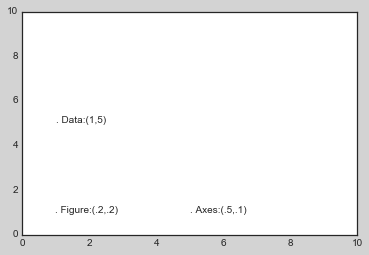

In [26]:
fig , ax = plt.subplots(facecolor='lightgray')
ax.axis([0,10,0,10])

# transform = ax.transData is the default, but we'll specify it anyway
ax.text(1,5,". Data:(1,5)", transform=ax.transData)
ax.text(.5,.1,". Axes:(.5,.1)",transform=ax.transAxes)
ax.text(.2,.2,". Figure:(.2,.2)",transform=fig.transFigure);

Text(2,-6,'local minimum')

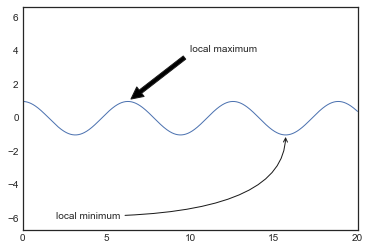

In [27]:
fix, ax = plt.subplots()
x = np.linspace(0,20,1000)
ax.plot(x, np.cos(x))
ax.axis('equal')
ax.annotate('local maximum', xy=(6.28,1),xytext=(10,4),
           arrowprops=dict(facecolor='black',shrink=0.05))
ax.annotate('local minimum', xy=(5*np.pi,-1),xytext=(2,-6),
           arrowprops=dict(arrowstyle="->",connectionstyle='angle3,angleA=0,angleB=-90'))

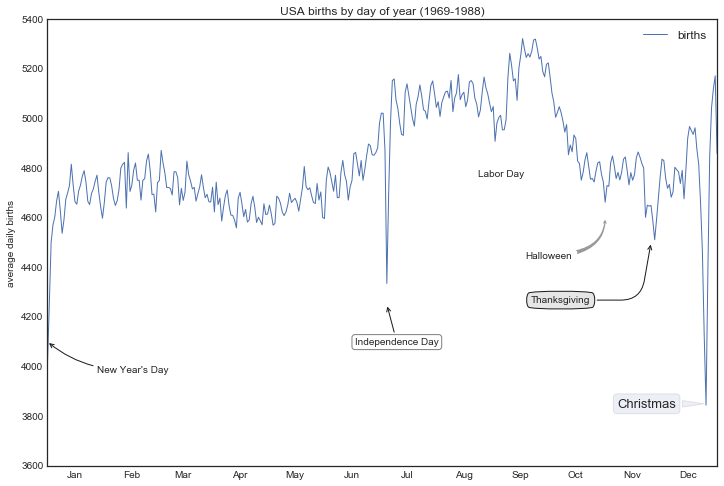

In [28]:
fig, ax = plt.subplots(figsize=(12,8))
births_by_date.plot(ax=ax)

#Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1',4100), xycoords='data',xytext=(50,-30),
           textcoords='offset points',arrowprops=dict(arrowstyle="->",connectionstyle='arc3,rad=-0.2'))

ax.annotate("Independence Day", xy=('2012-7-4',4250), xycoords='data',bbox=dict(boxstyle='round',fc='none',ec='gray'),
           xytext=(10,-40),textcoords='offset points',ha='center',arrowprops=dict(arrowstyle="->"))

ax.annotate("Labor Day", xy=('2012-9-4',4850), xycoords='data',xytext=(0,-20),
            textcoords='offset points',ha='center')

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400);

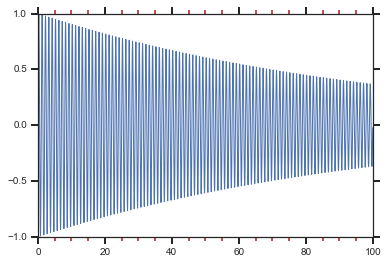

In [29]:

from matplotlib.ticker import AutoMinorLocator

# One can supply an argument to AutoMinorLocator to
# specify a fixed number of minor intervals per major interval, e.g.:
# minorLocator = AutoMinorLocator(2)
# would lead to a single minor tick between major ticks.

minorLocator = AutoMinorLocator()


t = np.arange(0.0, 100.0, 0.01)
s = np.sin(2*np.pi*t)*np.exp(-t*0.01)

fig, ax = plt.subplots()
plt.plot(t, s)

ax.xaxis.set_minor_locator(minorLocator)

plt.tick_params(which='both', width=2)
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4, color='r')

plt.show()



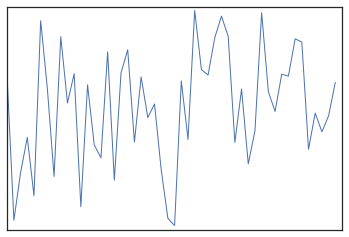

In [30]:
ax = plt.axes()
ax.plot(np.random.rand(50))
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())

### Reducing or increasing the number of ticks

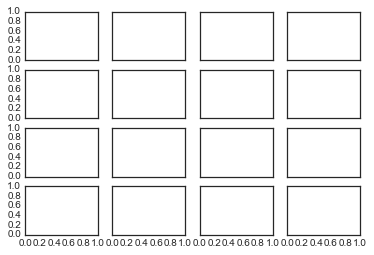

In [31]:
fig, ax = plt.subplots(4,4, sharex=True, sharey=True)

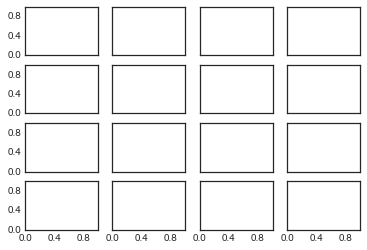

In [32]:
fig, ax = plt.subplots(4,4, sharex=True, sharey=True)
# for every axis set the x and y major locator
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))

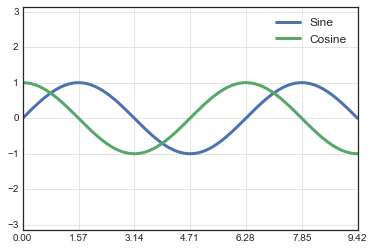

In [33]:
fig, ax = plt.subplots()
x = np.linspace(0,3*np.pi,1000)
ax.plot(x,np.sin(x),lw=3,label='Sine')
ax.plot(x,np.cos(x),lw=3,label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0,3*np.pi)
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi/2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi/4));